# Implementation of Spectrum Sensing using Support Vector Machine

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Extracting the training data
### Importing the dataset and seperating it into inputs and target

In [3]:
df_train = pd.read_csv("train_samples_new.csv")
df_train.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence
0,-0.91383-1.3532i,50,0,1.632861,No
1,0.47213+1.7098i,30,-2,1.773788,No
2,-0.5656-0.98212i,11,14,1.133342,Yes
3,0.018993-0.91356i,20,18,0.913757,Yes
4,0.83479-1.3865i,24,12,1.618412,Yes


In [4]:
encoder = LabelEncoder()   #LabelEncoder function is used to convert script data to numerical value
df_train['Primary_user_presence_n'] = encoder.fit_transform(df_train['Primary_User_Presence'])

df_train.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence,Primary_user_presence_n
0,-0.91383-1.3532i,50,0,1.632861,No,0
1,0.47213+1.7098i,30,-2,1.773788,No,0
2,-0.5656-0.98212i,11,14,1.133342,Yes,1
3,0.018993-0.91356i,20,18,0.913757,Yes,1
4,0.83479-1.3865i,24,12,1.618412,Yes,1


In [5]:
inputs_train = df_train.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
inputs_train.head()

,SNR,Amplitude
0,0,1.632861
1,-2,1.773788
2,14,1.133342
3,18,0.913757
4,12,1.618412


In [6]:
target_train = df_train['Primary_user_presence_n'] 
target_train.head()

0    0
1    0
2    1
3    1
4    1
Name: Primary_user_presence_n, dtype: int32

### Feeding the train data into the model

In [7]:
svmclassifier = SVC(kernel='linear',C=1, shrinking=True )   #For linearly seperable data
svmclassifier.fit(inputs_train, target_train)

SVC(C=1, kernel='linear')

In [7]:
svmclassifier.score(inputs_train,target_train)

0.74259

## Extracting the testing data
### Importing the dataset and seperating it into inputs and target

In [8]:
df_test = pd.read_csv("test_samples_new.csv")
df_test.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence
0,0.099661+0.29101i,61,18,0.307602,Yes
1,-0.44902-0.58142i,13,12,0.734621,Yes
2,1.0156-0.32622i,44,-2,1.066707,No
3,-0.0051797+0.10542i,0,12,0.105547,Yes
4,-0.093558-0.060805i,21,6,0.111581,No


In [9]:
df_test['Primary_user_presence_n'] = encoder.fit_transform(df_test['Primary_User_Presence'])

df_test.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence,Primary_user_presence_n
0,0.099661+0.29101i,61,18,0.307602,Yes,1
1,-0.44902-0.58142i,13,12,0.734621,Yes,1
2,1.0156-0.32622i,44,-2,1.066707,No,0
3,-0.0051797+0.10542i,0,12,0.105547,Yes,1
4,-0.093558-0.060805i,21,6,0.111581,No,0


In [10]:
inputs_test = df_test.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
inputs_test.head()

,SNR,Amplitude
0,18,0.307602
1,12,0.734621
2,-2,1.066707
3,12,0.105547
4,6,0.111581


In [11]:
target_test = df_test['Primary_user_presence_n']   #Target dataset containing presence of user
target_test.head()

0    1
1    1
2    0
3    1
4    0
Name: Primary_user_presence_n, dtype: int32

### Finding the testing accuracy of the model

In [12]:
svmclassifier.score(inputs_test,target_test)

0.74228

### Finding out number of misclassified samples

In [13]:
target_pred = svmclassifier.predict(inputs_test)

misclassified = np.where(target_test!=target_pred)
len(misclassified[0])

25772

### Confusion Matrix

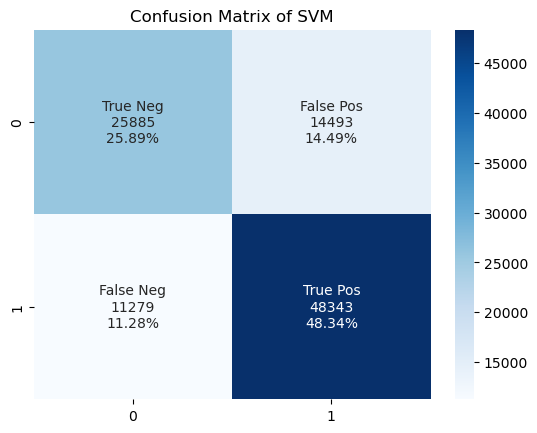

In [14]:
cf_SVM = confusion_matrix(target_test, target_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_SVM.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_SVM.flatten()/np.sum(cf_SVM)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
a= sns.heatmap(cf_SVM, annot=labels, fmt='', cmap='Blues')
a.set_title('Confusion Matrix of SVM')
plt.show()

In [15]:
TP=cf_SVM[1][1] 
TN=cf_SVM[0][0]
FP=cf_SVM[0][1]
FN=cf_SVM[1][0]
N=TP+TN+FP+FN

### Obatining the Probability of Detection

In [16]:
PD = TP/(FN+TP)
print("The probablity of detection of the model is "+ str(PD*100) + '%')

The probablity of detection of the model is 81.08248633054913%


### Obtaining the Probablilty of False Alarm

In [17]:
PF = FP/(FP+TN)
print("The probablity of false alarm of the model is "+ str(PF*100) + '%')

The probablity of false alarm of the model is 35.89330823715885%


### Plotting the graph for Probability of Detection at different values of SNR

In [18]:
df_sn4 = df_test[df_test['SNR'] == -4]
df_sn2 = df_test[df_test['SNR'] == -2]
df_s0 = df_test[df_test['SNR'] == 0]
df_s2 = df_test[df_test['SNR'] == 2]
df_s4 = df_test[df_test['SNR'] == 4]
df_s6 = df_test[df_test['SNR'] == 6]
df_s8 = df_test[df_test['SNR'] == 8]
df_s10 = df_test[df_test['SNR'] == 10]
df_s12 = df_test[df_test['SNR'] == 12]
df_s14 = df_test[df_test['SNR'] == 14]
df_s16 = df_test[df_test['SNR'] == 16]
df_s18 = df_test[df_test['SNR'] == 18]

In [19]:
inputs_test_sn4 = df_sn4.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_sn4 = df_sn4['Primary_user_presence_n']  

inputs_test_sn2 = df_sn2.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_sn2 = df_sn2['Primary_user_presence_n'] 

inputs_test_s0 = df_s0.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s0 = df_s0['Primary_user_presence_n'] 

inputs_test_s2 = df_s2.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s2 = df_s2['Primary_user_presence_n'] 

inputs_test_s4 = df_s4.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s4 = df_s4['Primary_user_presence_n'] 

inputs_test_s6 = df_s6.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s6 = df_s6['Primary_user_presence_n'] 

inputs_test_s8 = df_s8.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s8 = df_s8['Primary_user_presence_n'] 

inputs_test_s10 = df_s10.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s10 = df_s10['Primary_user_presence_n'] 

inputs_test_s12 = df_s12.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s12 = df_s12['Primary_user_presence_n'] 

inputs_test_s14 = df_s14.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s14 = df_s14['Primary_user_presence_n'] 

inputs_test_s16 = df_s16.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s16 = df_s16['Primary_user_presence_n'] 

inputs_test_s18 = df_s18.drop(['I/Q signal','Primary_User_Presence','Modulation_type','Primary_user_presence_n'],axis='columns') 
target_test_s18 = df_s18['Primary_user_presence_n'] 

In [20]:
lst_ip_tests = [inputs_test_sn4, inputs_test_sn2, inputs_test_s0, inputs_test_s2, inputs_test_s4, inputs_test_s6,
                inputs_test_s8, inputs_test_s10, inputs_test_s12, inputs_test_s14, inputs_test_s16, inputs_test_s18]

In [21]:
lst_tg_tests = [target_test_sn4, target_test_sn2, target_test_s0, target_test_s2, target_test_s4, target_test_s6,
                target_test_s8, target_test_s10, target_test_s12, target_test_s14, target_test_s16, target_test_s18]

In [22]:
lst_PD = []
for i in range (12):
    target_pred_new = svmclassifier.predict(lst_ip_tests[i])
    cf_SVM = confusion_matrix(lst_tg_tests[i], target_pred_new)
    TPn=cf_SVM[1][1] 
    TNn=cf_SVM[0][0]
    FPn=cf_SVM[0][1]
    FNn=cf_SVM[1][0]
    PDn = TPn/(FNn+TPn)
    lst_PD.append(PDn)

lst_PD

[0.25958254269449715,
 0.25293072824156304,
 0.2863573407202216,
 0.41130465694987556,
 0.5080199842229819,
 0.7186588921282799,
 0.9016830870279147,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [23]:
lst_Pfa_SVM = []
for i in range (12):
    target_pred_new = svmclassifier.predict(lst_ip_tests[i])
    cf_DT = confusion_matrix(lst_tg_tests[i], target_pred_new)
    TPn=cf_DT[1][1] 
    TNn=cf_DT[0][0]
    FPn=cf_DT[0][1]
    FNn=cf_DT[1][0]
    Pfan = FPn/(FPn+TNn)
    lst_Pfa_SVM.append(Pfan)

    
lst_Pfa_SVM

[0.08797190517998243,
 0.1005678695731819,
 0.12007400555041628,
 0.159181455994205,
 0.24660583129312263,
 0.45046110191534644,
 0.8056598325151603,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

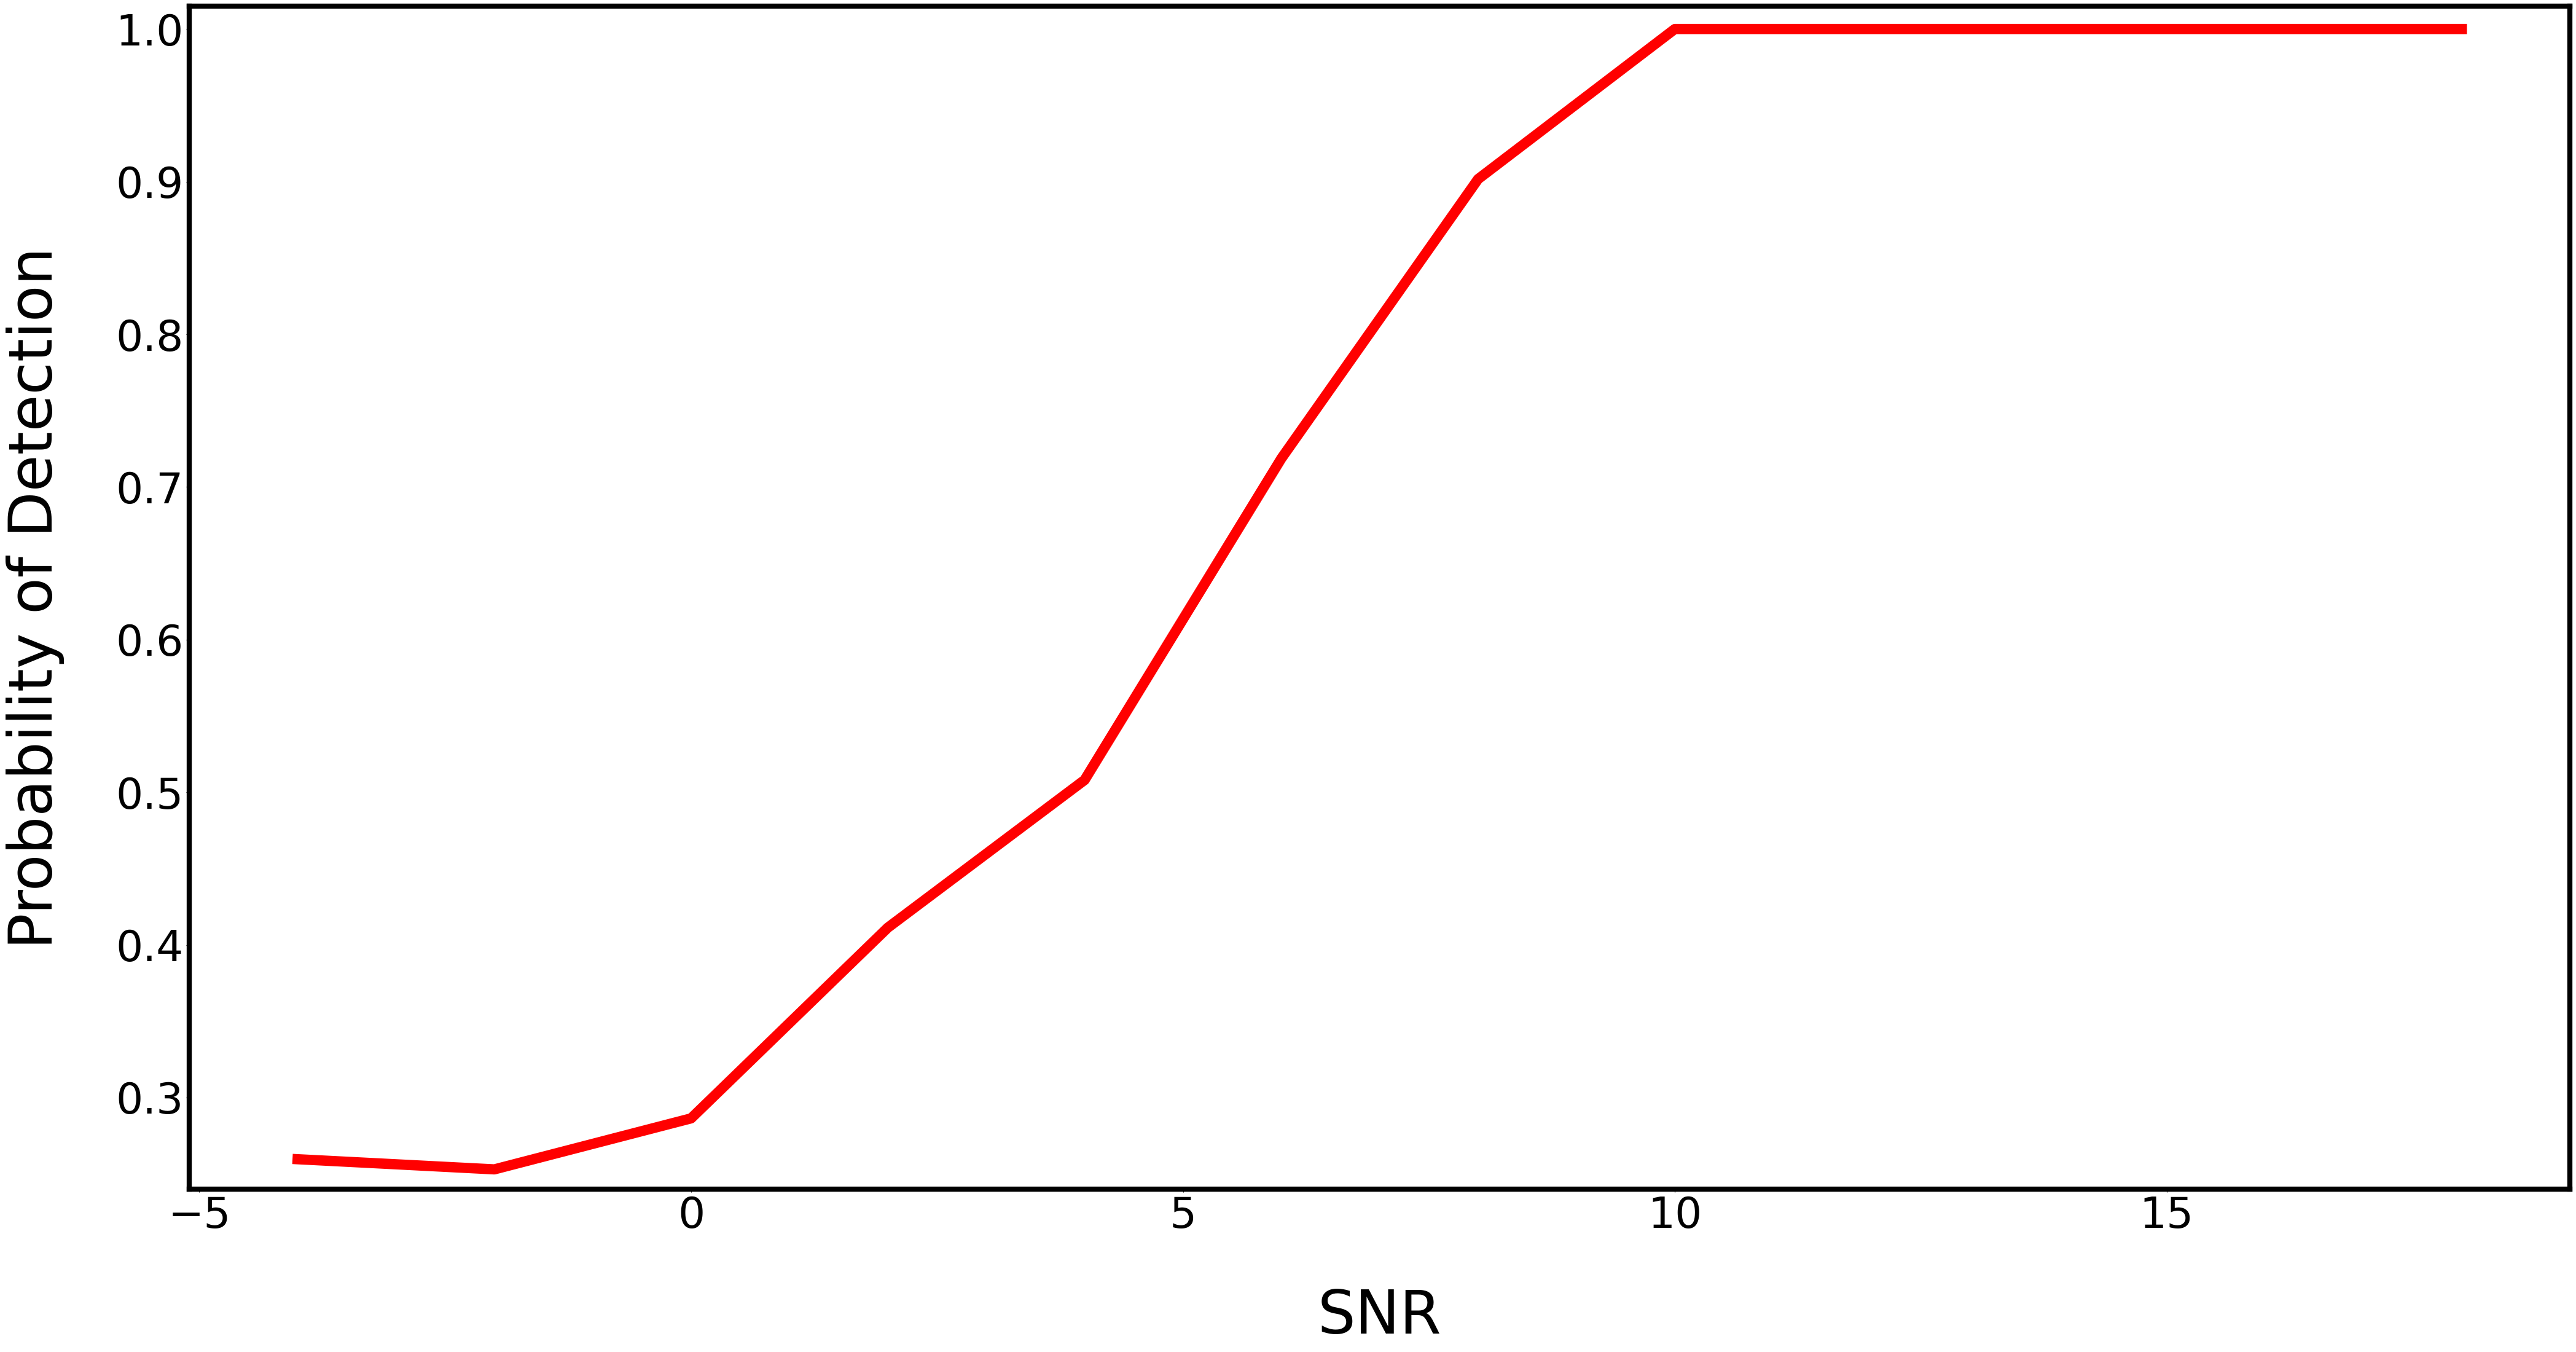

In [24]:
lst_snr = [-4,-2,0,2,4,6,8,10,12,14,16,18]
fig, ax = plt.subplots(figsize=(50, 25))
ax.plot(lst_snr, lst_PD, color='red', linewidth=12)

# Set the plot limits and axis labels
ax.set_ylim(0.24, 1.015)
ax.set_xlabel('SNR', fontsize=70, labelpad=60)
ax.set_ylabel('Probability of Detection', fontsize=70, labelpad=60)
ax.tick_params(labelsize=50)
#ax.set_title("Plot of Pd vs SNR for SVM", fontsize=80)

# Customize the spines to create a border
ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(6)
ax.spines['bottom'].set_color('black')

# Show the plot
plt.show()

### Plotting the graph of Accuracy at different values of SNR

In [25]:
# Creating a list of Accuracy values at different SNR for the plot
lst_Acc = []
for i in range (12):
    a = svmclassifier.score(lst_ip_tests[i],lst_tg_tests[i])
    lst_Acc.append(a)
lst_Acc

[0.7056422569027611,
 0.6794778825235678,
 0.673218376944411,
 0.6958608278344331,
 0.6409112825458052,
 0.6329538645895746,
 0.6077984403119376,
 0.7102183616841597,
 0.768048048048048,
 0.8647072822465492,
 0.9354298696639962,
 0.9878730234217097]

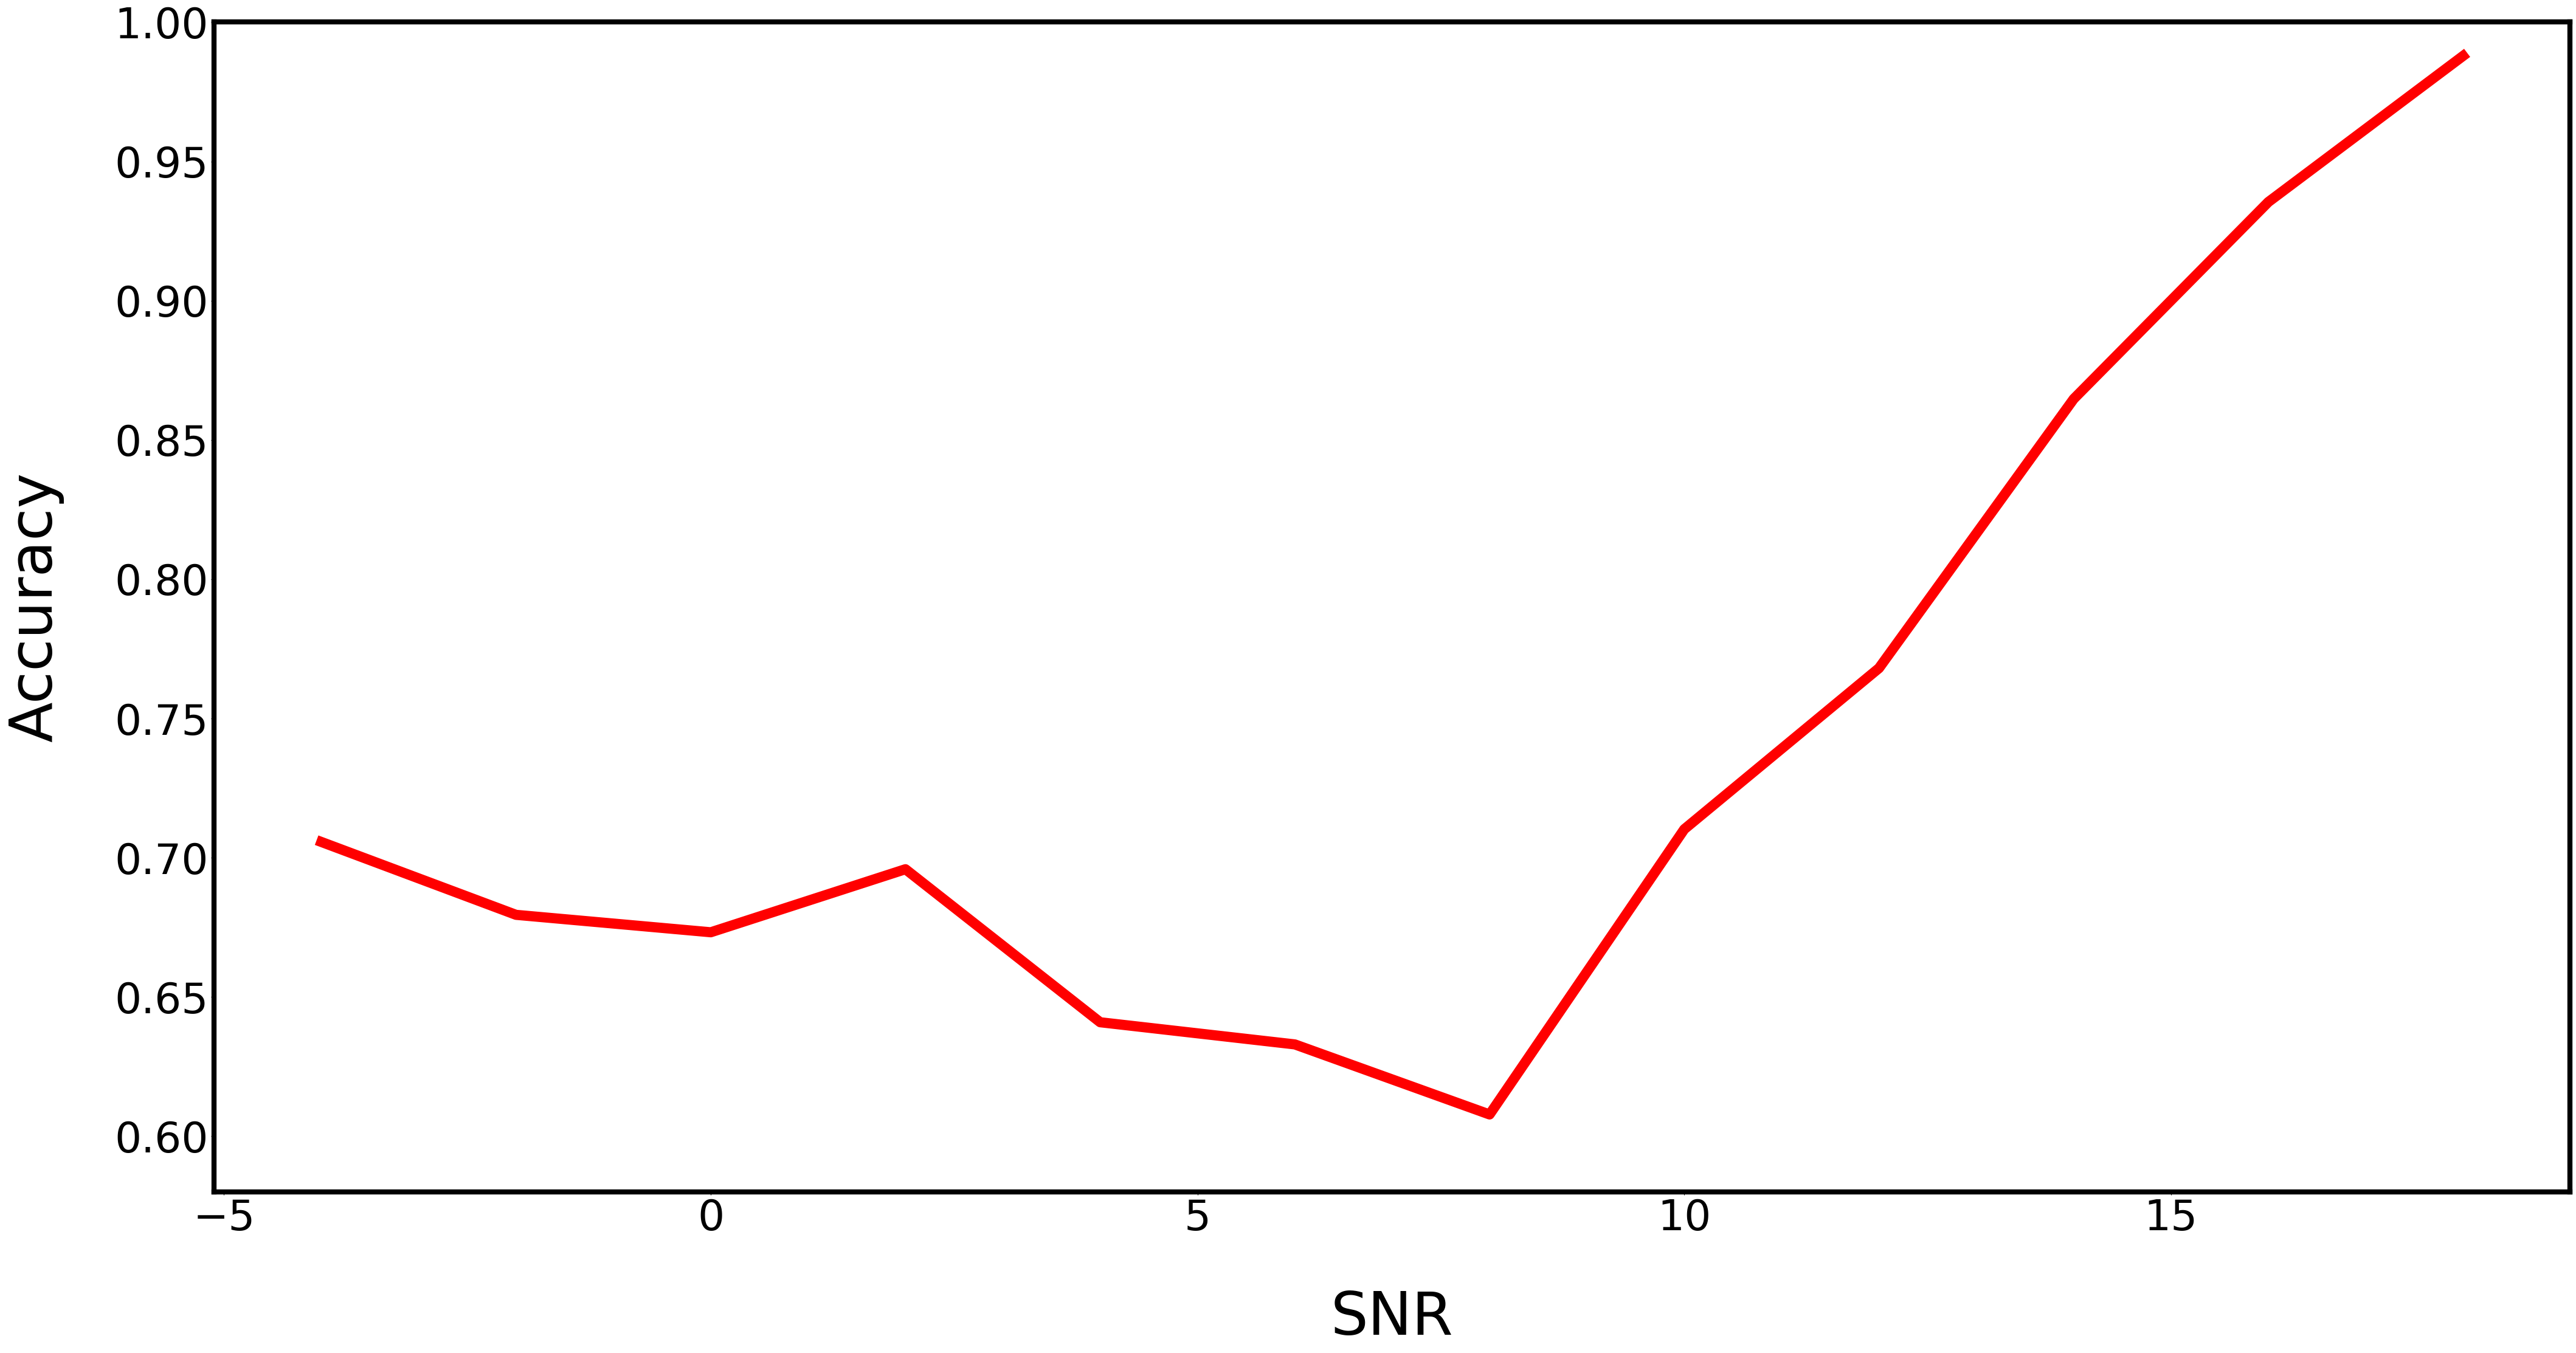

In [41]:
fig, ax = plt.subplots(figsize=(50, 25))
ax.plot(lst_snr, lst_Acc, color='red', linewidth=12)


ax.set_ylim(0.58, 1.0001)
ax.set_xlabel('SNR', fontsize=70, labelpad=60)
ax.set_ylabel('Accuracy', fontsize=70, labelpad=60)
ax.tick_params(labelsize=50)

ax.spines['right'].set_linewidth(6)
ax.spines['top'].set_linewidth(6)
ax.spines['left'].set_linewidth(6)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(6)
ax.spines['bottom'].set_color('black')
plt.show()

### The evaluation paramter values are

<table style="width:50%">
  <tr>
    <th style="font-size:15px; text-align:left">Criteria</th>
    <th style="font-size:15px; text-align:left">Obtained Values</th> 
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Accuracy</td>
    <td style="font-size:13px; text-align:left">74.22 %</td>
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Probability of Detection</td>
    <td style="font-size:13px; text-align:left">81.08 %</td>
  </tr>
  <tr>
    <td style="font-size:13px; text-align:left">Probability of False Alarm</td>
    <td style="font-size:13px; text-align:left">1.19</td>
  </tr>
</table>

### And the number of misclassified samples are 25772